<h2><center>Skin cancer detection by means of AI</center></h2>
<h3><center>Exploratory Data Analysis</center></h3>

<h4><center>Group 3: Livia Popper, Kyriakos Koukiadakis, Aizhan Shagadatova</center></h4>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
# from keras.utils import to_categorical
from keras.preprocessing import image

from random import shuffle

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [2]:
from PIL import Image
import PIL.ImageOps
import requests
import io

## Exploratory Data Analysis

In [3]:
images_url = "https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/images/"

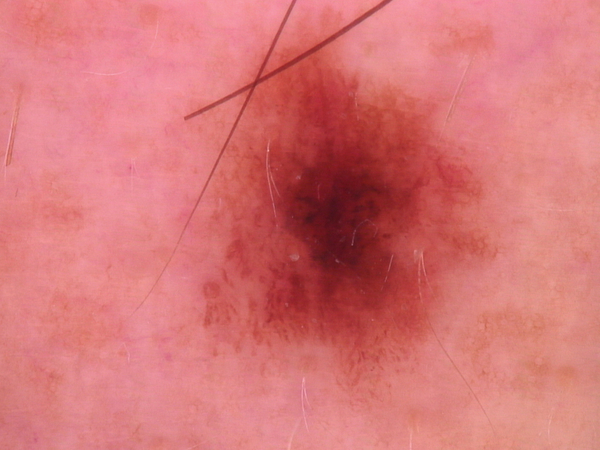

In [4]:
r = requests.get(images_url + 'ISIC_0024306.jpg', stream=True)
img = Image.open(io.BytesIO(r.content))
img

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/GroundTruth.csv')
df.head(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data description

Cases include a representative collection of several important diagnostic categories in the realm of pigmented lesions:

- melanoma (MEL);
- melanocytic nevi (NV);
- basal cell carcinoma (BCC);
- Actinic keratoses and intraepithelial carcinoma / Bowen's disease (AKIEC);
- benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, BKL);
- dermatofibroma (DF);
- vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, VASC).

In [6]:
cols = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
df[cols] = df[cols].astype(int)

In [7]:
no_sampes_mel = df['MEL'].sum()
no_sampes_nv = df['NV'].sum()
no_sampes_bcc = df['BCC'].sum()
no_sampes_akiec = df['AKIEC'].sum()
no_sampes_bkl = df['BKL'].sum()
no_sampes_df = df['DF'].sum()
no_sampes_vasc = df['VASC'].sum()

In [8]:
df.tail(100)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
9915,ISIC_0034221,0,0,0,0,1,0,0
9916,ISIC_0034222,1,0,0,0,0,0,0
9917,ISIC_0034223,0,0,1,0,0,0,0
9918,ISIC_0034224,0,1,0,0,0,0,0
9919,ISIC_0034225,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1,0,0,0,0,0,0
10011,ISIC_0034317,1,0,0,0,0,0,0
10012,ISIC_0034318,0,0,0,0,1,0,0
10013,ISIC_0034319,0,1,0,0,0,0,0


In [9]:
print("MEL class contains", no_sampes_mel, "samples.")
print("NV class contains", no_sampes_nv, "samples.")
print("BCC class contains", no_sampes_bcc, "samples.")
print("AKIEC class contains", no_sampes_akiec, "samples.")
print("BKL class contains", no_sampes_bkl, "samples.")
print("DF class contains", no_sampes_df, "samples.")
print("VASC class contains", no_sampes_vasc, "samples.")

MEL class contains 1113 samples.
NV class contains 6705 samples.
BCC class contains 514 samples.
AKIEC class contains 327 samples.
BKL class contains 1099 samples.
DF class contains 115 samples.
VASC class contains 142 samples.


In [10]:
total_no_of_samples = no_sampes_mel + no_sampes_nv + no_sampes_bcc + no_sampes_akiec + no_sampes_bkl + no_sampes_df + no_sampes_vasc
total_no_of_samples

10015

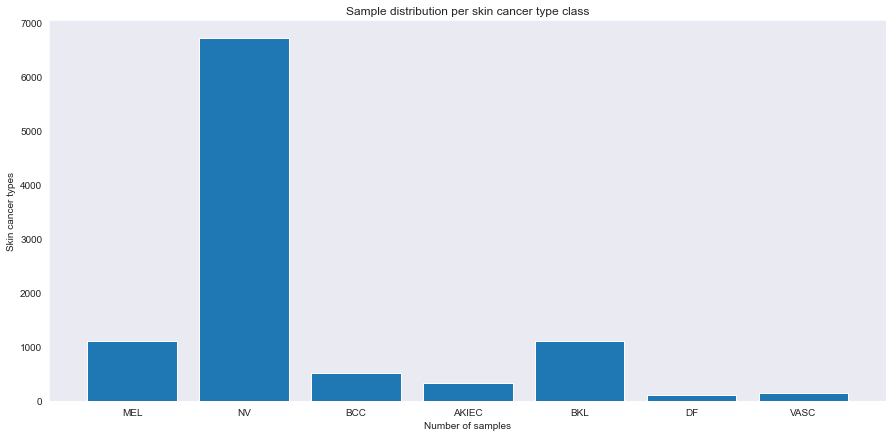

In [11]:
# plt.rc('font', size=15)

fig = plt.figure(figsize = (15,7))
# ax = fig.add_axes([0,0,1,1])
samples_cols = [no_sampes_mel, no_sampes_nv, no_sampes_bcc, no_sampes_akiec, no_sampes_bkl, no_sampes_df, no_sampes_vasc]
plt.bar(cols,samples_cols)
plt.xlabel("Number of samples")
plt.ylabel("Skin cancer types")
plt.title("Sample distribution per skin cancer type class")
plt.grid(False)
plt.show()
# plt.savefig('sample_distribution_per_class.png', transparent=True)

Text(0.5, 1.0, 'Skin lesions overview')

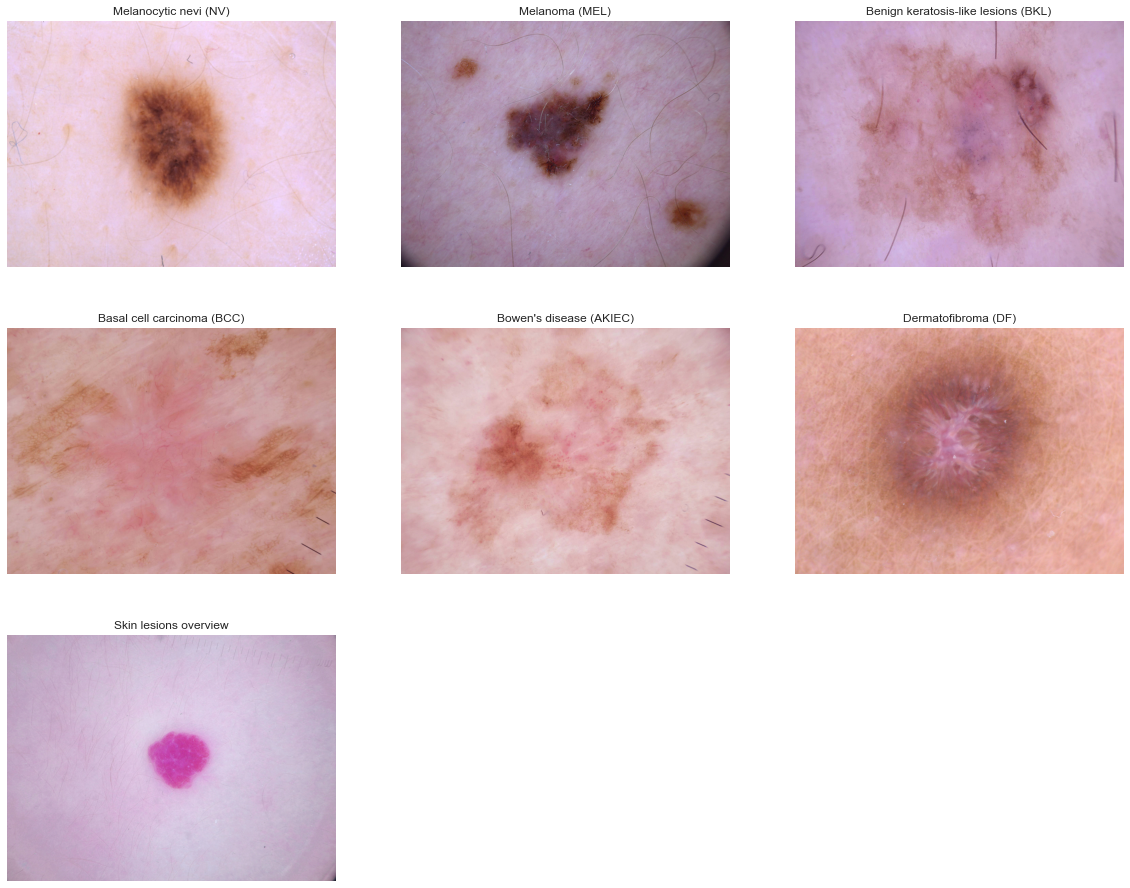

In [12]:
fig = plt.figure(figsize=(20, 16))
  
# setting values to rows and column variables
rows = 3
columns = 3
  
# reading images
Image1_NV = Image.open(io.BytesIO((requests.get(images_url + 'ISIC_0024366.jpg', stream=True)).content))
Image2_MEL = Image.open(io.BytesIO((requests.get(images_url + 'ISIC_0024315.jpg', stream=True)).content))
Image3_BKL = Image.open(io.BytesIO((requests.get(images_url + 'ISIC_0024312.jpg', stream=True)).content))
Image4_BCC = Image.open(io.BytesIO((requests.get(images_url + 'ISIC_0024345.jpg', stream=True)).content))
Image5_AKIEC = Image.open(io.BytesIO((requests.get(images_url + 'ISIC_0024579.jpg', stream=True)).content))
Image6_DF = Image.open(io.BytesIO((requests.get(images_url + 'ISIC_0024318.jpg', stream=True)).content))
Image7_VASC = Image.open(io.BytesIO((requests.get(images_url + 'ISIC_0024402.jpg', stream=True)).content))
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1_NV)
plt.axis('off')
plt.title("Melanocytic nevi (NV)")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2_MEL)
plt.axis('off')
plt.title("Melanoma (MEL)")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3_BKL)
plt.axis('off')
plt.title("Benign keratosis-like lesions (BKL)")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4_BCC)
plt.axis('off')
plt.title("Basal cell carcinoma (BCC)")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Image5_AKIEC)
plt.axis('off')
plt.title("Bowen's disease (AKIEC)")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Image6_DF)
plt.axis('off')
plt.title("Dermatofibroma (DF)")

# Adds a subplot at the 7th position
fig.add_subplot(rows, columns, 7)

# showing image
plt.imshow(Image7_VASC)
plt.axis('off')
plt.title("Skin lesions overview")

# plt.savefig('skin_cancer_types.png')